# MP 1: Safety Analysis of Autonomous Vehicles
## Part 1: Simulation with Carla
Group 9: 
- Zach Larson (zlarson2)
- Máximo Rojas (mgr9)
- Matthew Paul (mjpaul3)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from dtaidistance import dtw

### Task 1

**1. Import all the .csv data (including 4 weather conditions:"clear-night", "clearsunset", "clear-noon", "rain-noon") of the ghost_cutin scene into Jupyter Notebook.
List the first 5 rows of the ctl.csv, cvip.csv, and traj.csv with the clear-night weather
condition. (1 point)**

In [2]:
# Importing csv data

# Clear Night
clear_night_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_ctl.csv")
clear_night_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_cvip.csv")
clear_night_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_traj.csv")

# Clear Sunset
clear_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_ctl.csv")
clear_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_cvip.csv")
clear_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_traj.csv")

# Clear Noon
clear_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_ctl.csv")
clear_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_cvip.csv")
clear_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_traj.csv")

# Rain Noon
rain_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_ctl.csv")
rain_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_cvip.csv")
rain_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_traj.csv")

# Haze Noon
haze_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_ctl.csv")
haze_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_cvip.csv")
haze_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_traj.csv")

# Haze Sunset
haze_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_ctl.csv")
haze_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_cvip.csv")
haze_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_traj.csv")

In [3]:
# First 5 rows of clear-night condition

print(clear_night_ctl.head(5),'\n')
print(clear_night_cvip.head(5),'\n')
print(clear_night_traj.head(5))

      ts  agent_id  throttle     steer  brake
0  34097         0       0.9 -0.013192    0.0
1  34098         0       0.9 -0.003670    0.0
2  34099         0       0.9 -0.004190    0.0
3  34100         0       0.9 -0.003286    0.0
4  34101         0       0.9  0.000093    0.0 

      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  34097         0  500.491189  198.767441 -95.832657 -499.819366
1  34098         0    5.595580  195.567444 -90.832657    0.100000
2  34099         0    5.592365  195.567444 -90.832657    0.095407
3  34100         0    5.589578  195.567444 -90.832657    0.084691
4  34101         0    5.587154  195.567444 -90.832657    0.069311 

      ts  agent_id           x         y         z    v
0  34097         0  192.362411 -86.26268  0.539326  0.0
1  34098         0  192.362411 -86.26268  0.491906  0.0
2  34099         0  192.362411 -86.26268  0.438374  0.0
3  34100         0  192.362411 -86.26268  0.378732  0.0
4  34101         0  192.362411 -86.26268  0.

**2. Summarize the following information for each weather condition ("clear-night",
"clear-sunset", "clear-noon", "rain-noon"): (2 points)**

>**a. The duration of the scene.**

>**b. Mean and standard deviation of the values of the features (“throttle”, “steer”, “brake”, “cvip”, “x”, “y”, “v”). Round your results to 3 decimal place and save them in a table, with the weather conditions as columns, and the features as rows (hint: you can store the table in a data frame).**

In [4]:
# Clear Night Summarization, Duration

clear_night_dfs = [clear_night_ctl,clear_night_cvip,clear_night_traj]
clear_night = clear_night_dfs[0]
for df in clear_night_dfs[1:]:
    clear_night = pd.merge(clear_night, df, on=['ts', 'agent_id'])
clear_night = clear_night.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_night = clear_night[1:].reset_index().drop(['index'],axis=1)

clear_night_duration = clear_night['ts'][clear_night.shape[0]-1] - clear_night['ts'][0]
# print(clear_night['ts'][0],clear_night['ts'][clear_night.shape[0]-1])
# print(clear_night_duration," milliseonds")

In [5]:
## Clear Sunset Compilation, Duration
clear_sunset_dfs = [clear_sunset_ctl,clear_sunset_cvip,clear_sunset_traj]
clear_sunset = clear_sunset_dfs[0]
for df in clear_sunset_dfs[1:]:
    clear_sunset = pd.merge(clear_sunset, df, on=['ts', 'agent_id'])
clear_sunset = clear_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_sunset = clear_sunset[1:].reset_index().drop(['index'],axis=1)

clear_sunset_duration = clear_sunset['ts'][clear_sunset.shape[0]-1] - clear_sunset['ts'][0]
# print(clear_sunset['ts'][0],clear_sunset['ts'][clear_sunset.shape[0]-1])
# print(clear_sunset_duration," milliseonds")

In [6]:
## Clear Noon Compilation, Duration
clear_noon_dfs = [clear_noon_ctl,clear_noon_cvip,clear_noon_traj]
clear_noon = clear_noon_dfs[0]
for df in clear_noon_dfs[1:]:
    clear_noon = pd.merge(clear_noon, df, on=['ts', 'agent_id'])
clear_noon = clear_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_noon = clear_noon[1:].reset_index().drop(['index'],axis=1)

clear_noon_duration = clear_noon['ts'][clear_noon.shape[0]-1] - clear_noon['ts'][0]
# print(clear_noon['ts'][0],clear_noon['ts'][clear_noon.shape[0]-1])
# print(clear_noon_duration," milliseonds")

In [7]:
## Rainy Noon Compilation, Duration
rain_noon_dfs = [rain_noon_ctl,rain_noon_cvip,rain_noon_traj]
rain_noon = rain_noon_dfs[0]
for df in rain_noon_dfs[1:]:
    rain_noon = pd.merge(rain_noon, df, on=['ts', 'agent_id'])
rain_noon = rain_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
rain_noon = rain_noon[1:].reset_index().drop(['index'],axis=1)

rain_noon_duration = rain_noon['ts'][rain_noon.shape[0]-1] - rain_noon['ts'][0]
# print(rain_noon['ts'][0],rain_noon['ts'][rain_noon.shape[0]-1])
# print(rain_noon_duration," milliseonds")

In [8]:
## Hazy Noon Compilation, Duration
haze_noon_dfs = [haze_noon_ctl,haze_noon_cvip,haze_noon_traj]
haze_noon = haze_noon_dfs[0]
for df in haze_noon_dfs[1:]:
    haze_noon = pd.merge(haze_noon, df, on=['ts', 'agent_id'])
haze_noon = haze_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
haze_noon = haze_noon[1:].reset_index().drop(['index'],axis=1)

haze_noon_duration = haze_noon['ts'][haze_noon.shape[0]-1] - haze_noon['ts'][0]
# print(haze_noon['ts'][0],haze_noon['ts'][haze_noon.shape[0]-1])
# print(haze_noon_duration," milliseonds")

In [9]:
## Hazy Sunset Compilation, Duration
haze_sunset_dfs = [haze_sunset_ctl,haze_sunset_cvip,haze_sunset_traj]
haze_sunset = haze_sunset_dfs[0]
for df in haze_sunset_dfs[1:]:
    haze_sunset = pd.merge(haze_sunset, df, on=['ts', 'agent_id'])
haze_sunset = haze_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
haze_sunset = haze_sunset[1:].reset_index().drop(['index'],axis=1)

haze_sunset_duration = haze_sunset['ts'][haze_sunset.shape[0]-1] - haze_sunset['ts'][0]
# print(haze_sunset['ts'][0],haze_sunset['ts'][haze_sunset.shape[0]-1])
# print(haze_sunset_duration," milliseonds")

In [10]:
## Mean and STD Calculations -- Combined
means_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Haze Noon":haze_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Haze Sunset":haze_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
}
means = pd.DataFrame(means_dict)

std_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Haze Noon":haze_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Haze Sunset":haze_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
}
stds = pd.DataFrame(std_dict)

# Durations -- Combined
duration_dict = {
    "Clear Night":clear_night_duration,
    "Clear Sunset":clear_sunset_duration,
    "Clear Noon":clear_noon_duration,
    "Rain Noon":rain_noon_duration,
    "Haze Noon":haze_noon_duration,
    "Haze Sunset":haze_sunset_duration,
}
durations = pd.DataFrame(list(duration_dict.values()), index=list(duration_dict.keys()),columns=["Duration (ms)"]).T

In [11]:
# Means Table
means

,Clear Night,Clear Sunset,Clear Noon,Rain Noon,Haze Noon,Haze Sunset
throttle,0.633,0.610,0.609,0.644,0.601,0.601
steer,0.004,0.000,0.001,-0.000,0.001,0.001
brake,0.116,0.057,0.061,0.047,0.055,0.059
cvip,32.185,19.488,18.826,5.828,19.118,19.730
x,191.313,192.947,192.921,192.631,192.941,192.944
y,-32.170,-31.068,-31.347,-63.818,-31.725,-31.407
v,6.223,6.893,6.938,6.358,6.927,6.877


In [12]:
# STD Table
stds

,Clear Night,Clear Sunset,Clear Noon,Rain Noon,Haze Noon,Haze Sunset
throttle,0.345,0.281,0.282,0.273,0.298,0.304
steer,0.048,0.005,0.005,0.003,0.005,0.005
brake,0.320,0.232,0.240,0.213,0.227,0.236
cvip,27.841,17.432,16.721,1.260,16.415,17.262
x,1.171,0.400,0.404,0.253,0.411,0.410
y,39.071,40.427,40.487,21.141,40.711,40.589
v,2.877,3.307,3.277,3.856,3.043,3.055


In [13]:
# Durations
durations

,Clear Night,Clear Sunset,Clear Noon,Rain Noon,Haze Noon,Haze Sunset
Duration (ms),838,756,750,400,751,757


**3. Visualize the campaign results of the ghost_cutin scene for each weather condition. Plot the throttle values (y-axis) of the agent vs time (x-aixs). Please plot all the weather conditions in one figure, and repeat the same step for all other features as well (“steer”, “brake”, “cvip”, “x”, “y”, “v”). (2 points)**

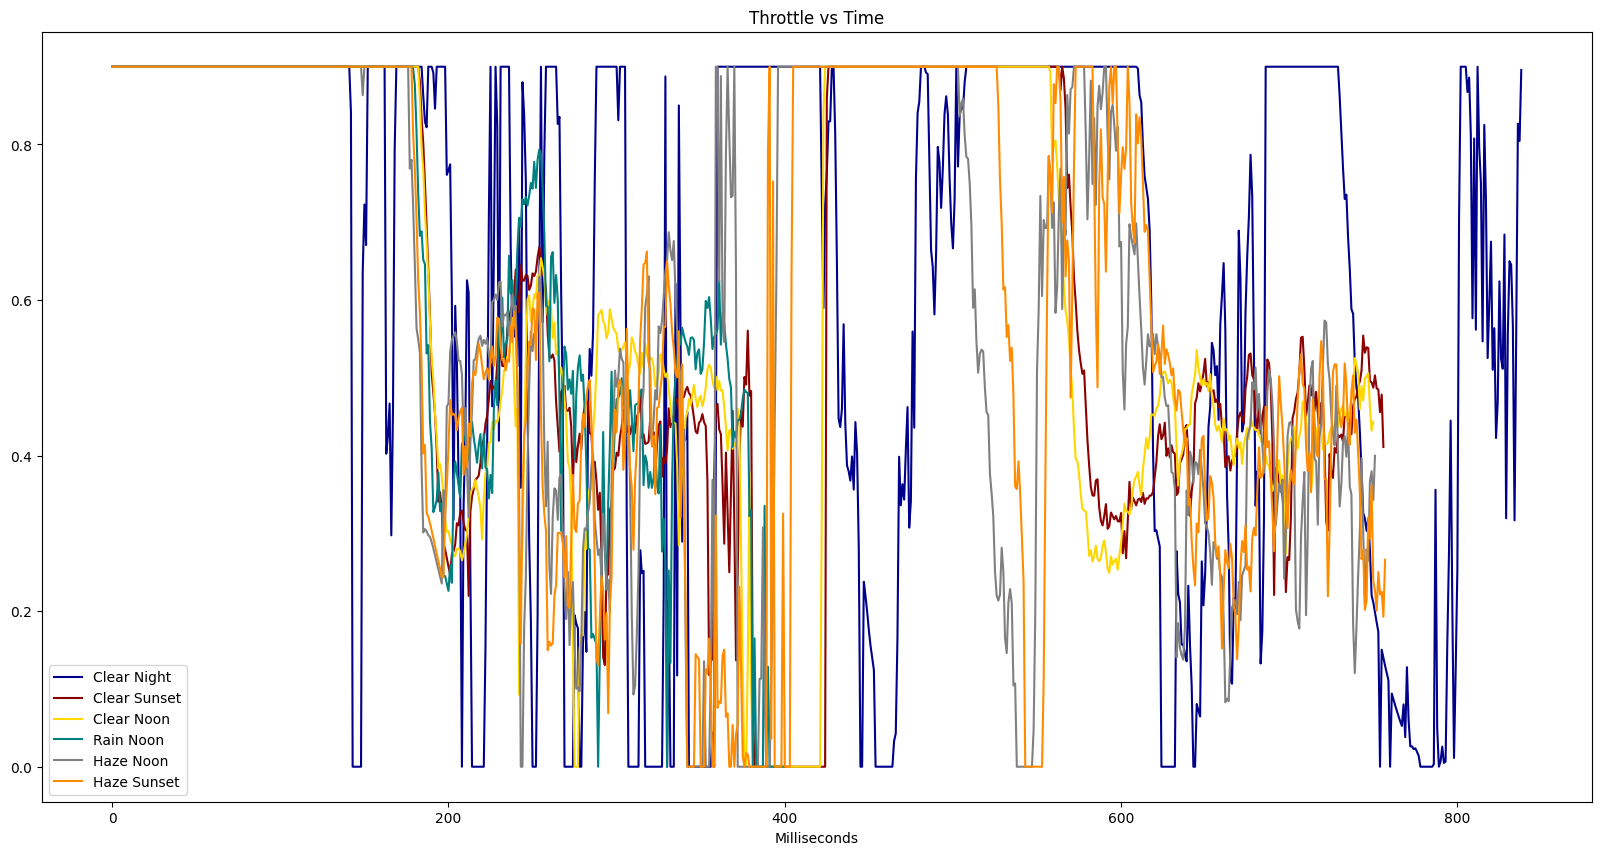

In [14]:
# generating time scale
time = np.arange(0,1000,1)

## Throttle vs Time
plt.figure(figsize=(20,10))

plt.title("Throttle vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['throttle'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['throttle'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['throttle'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['throttle'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['throttle'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/throttle_time.png")
plt.show()

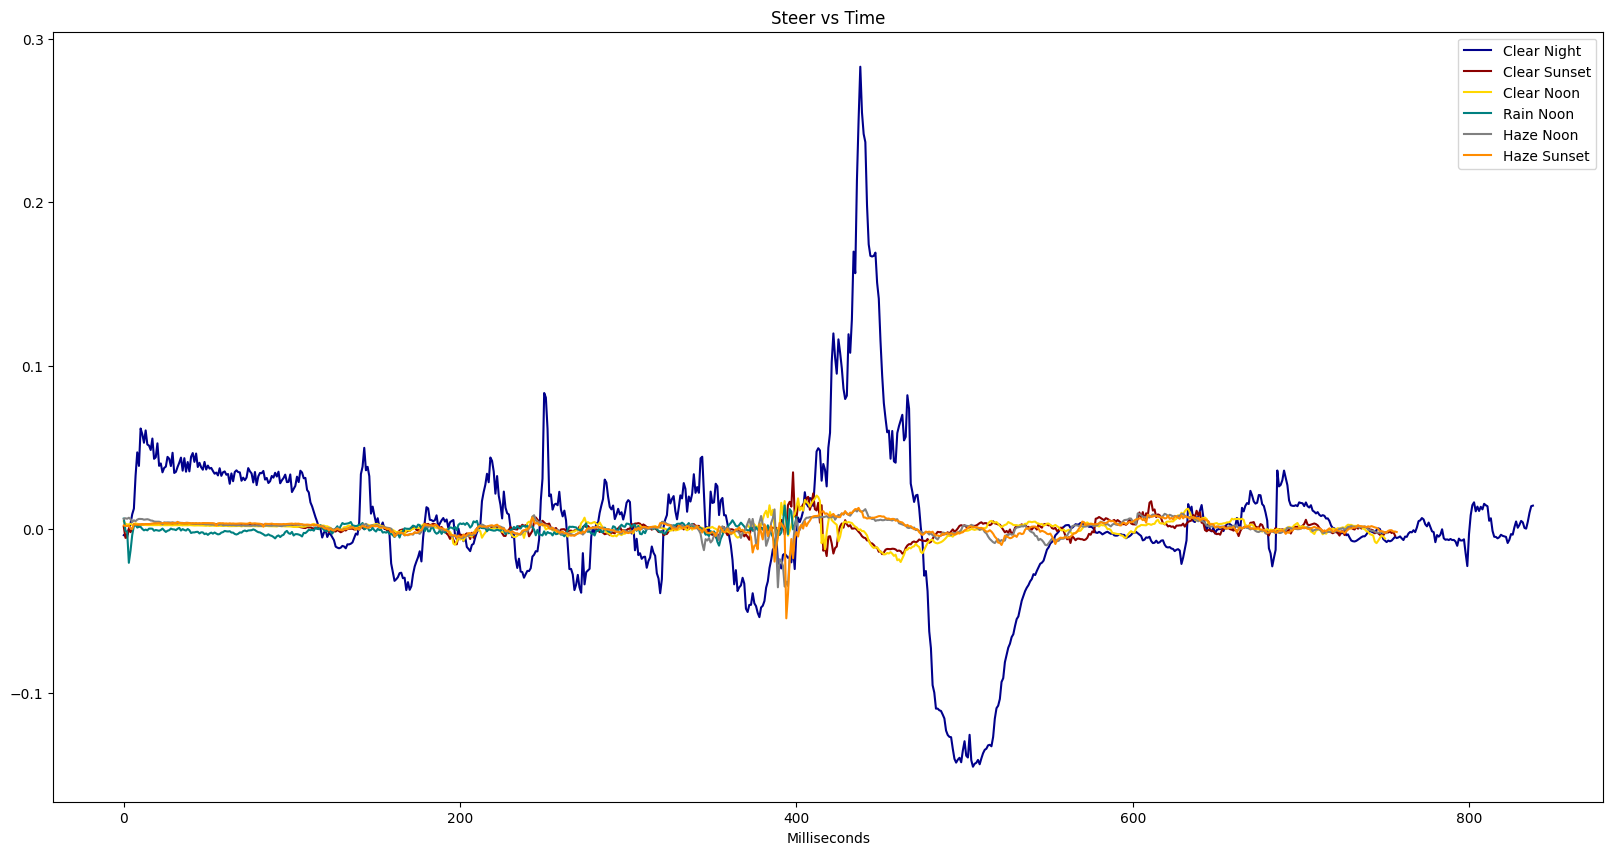

In [18]:
## Steer vs Time
plt.figure(figsize=(20,10))

plt.title("Steer vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['steer'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['steer'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['steer'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['steer'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['steer'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['steer'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/steer_time.png")
plt.show()

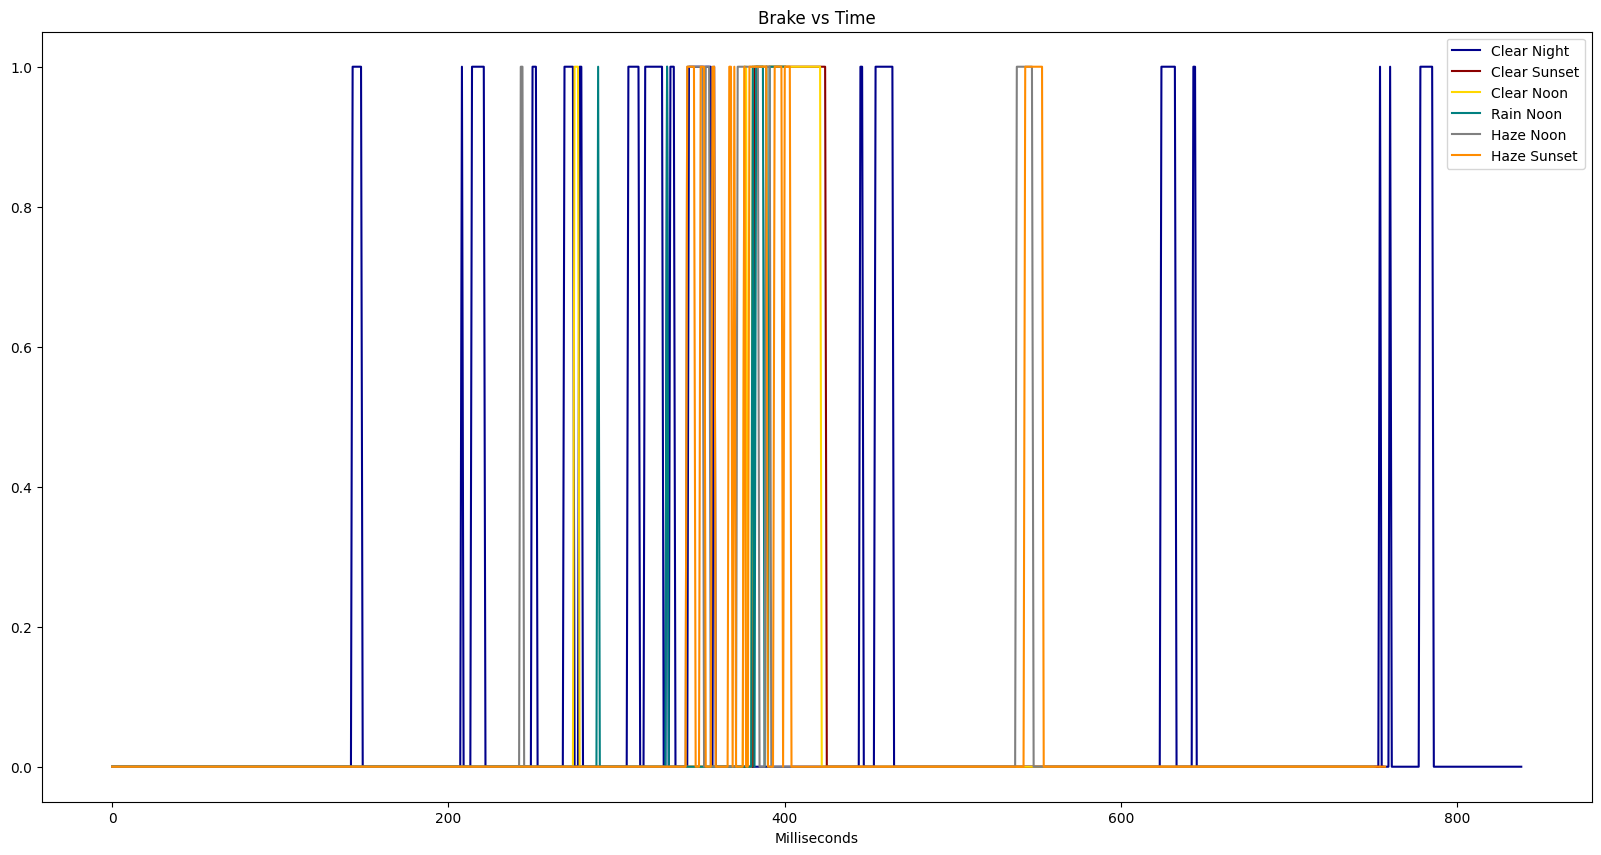

In [19]:
## Brake vs Time
plt.figure(figsize=(20,10))

plt.title("Brake vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['brake'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['brake'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['brake'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['brake'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['brake'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/brake_time.png")
plt.show()

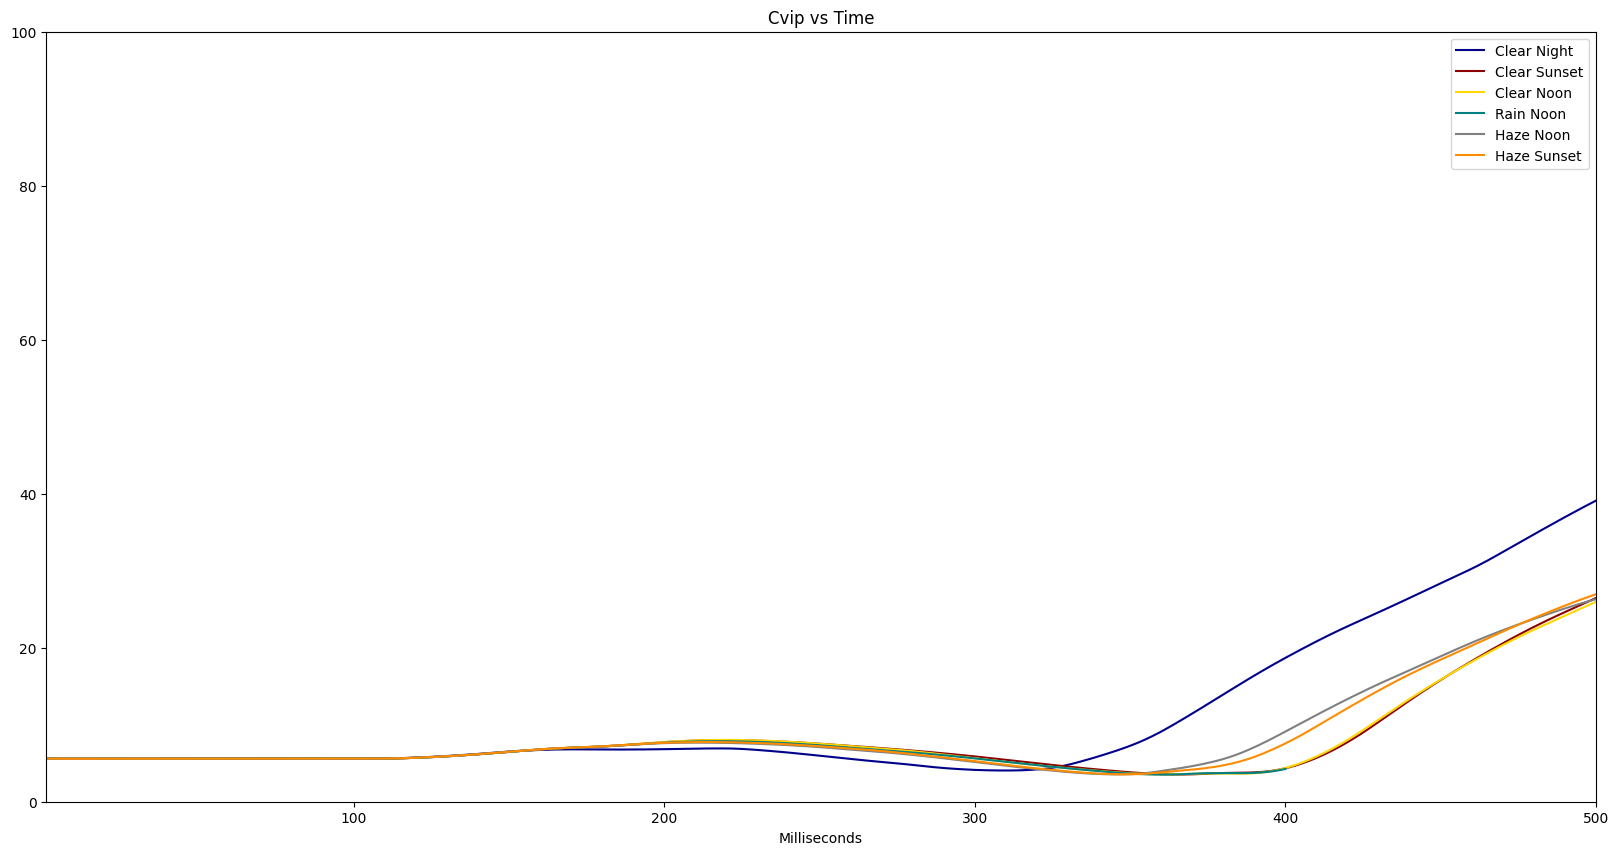

In [20]:
## Cvip vs Time
plt.figure(figsize=(20,10))

plt.title("Cvip vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['cvip'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['cvip'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['cvip'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['cvip'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['cvip'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['cvip'],color='darkorange',label="Haze Sunset")

plt.ylim(0,100)
plt.xlim(1,500)

plt.legend()
# plt.savefig("Figures/cvip_time.png")
plt.show()

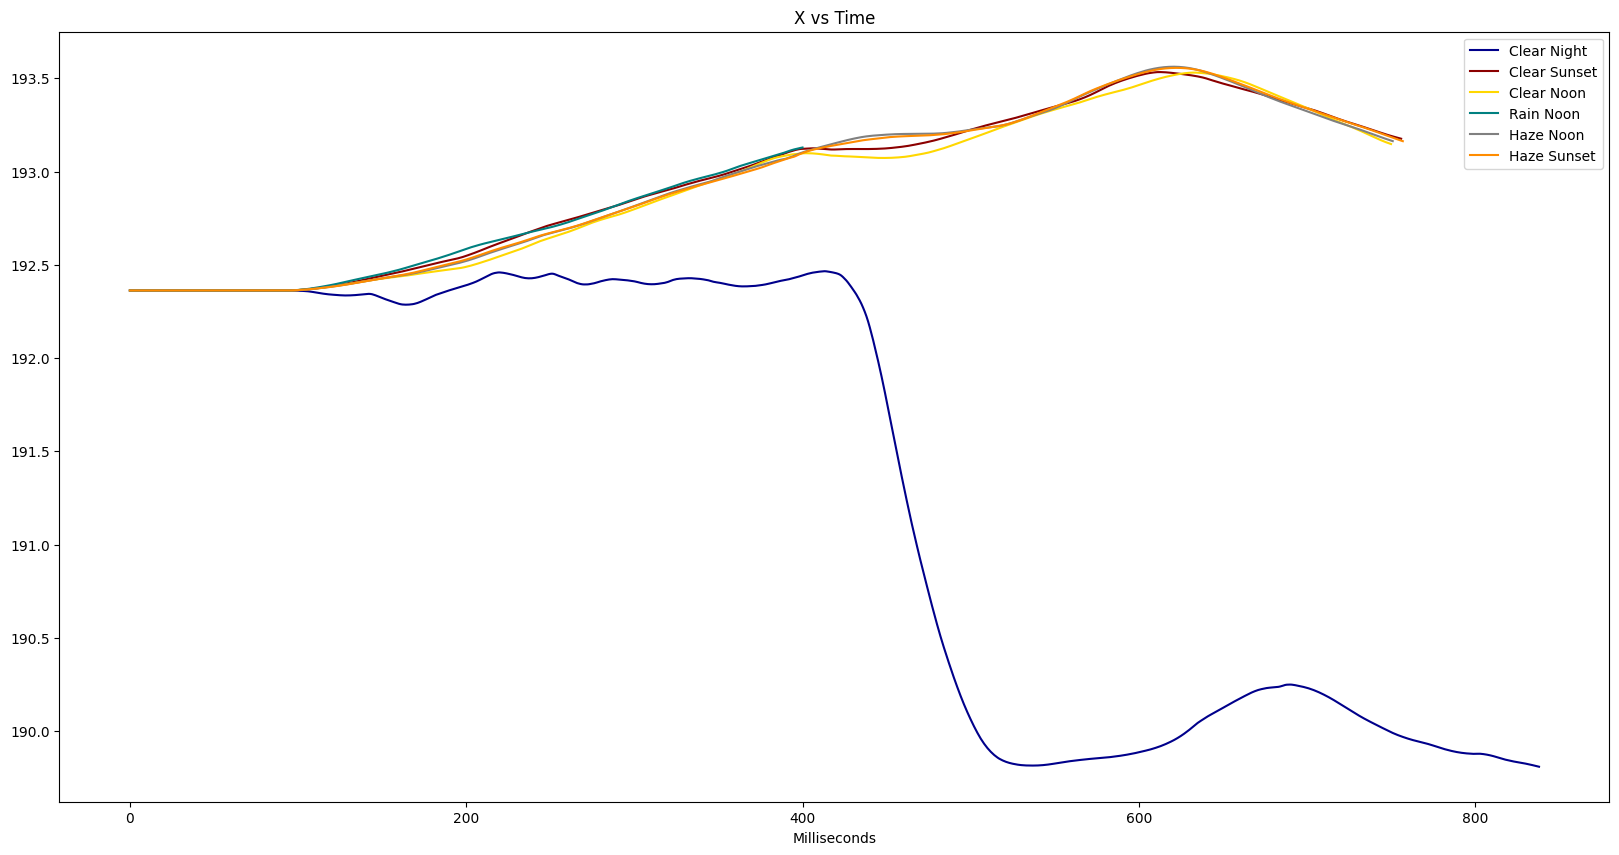

In [21]:
## X vs Time
plt.figure(figsize=(20,10))

plt.title("X vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['x'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['x'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['x'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['x'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['x'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['x'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/x_time.png")
plt.show()

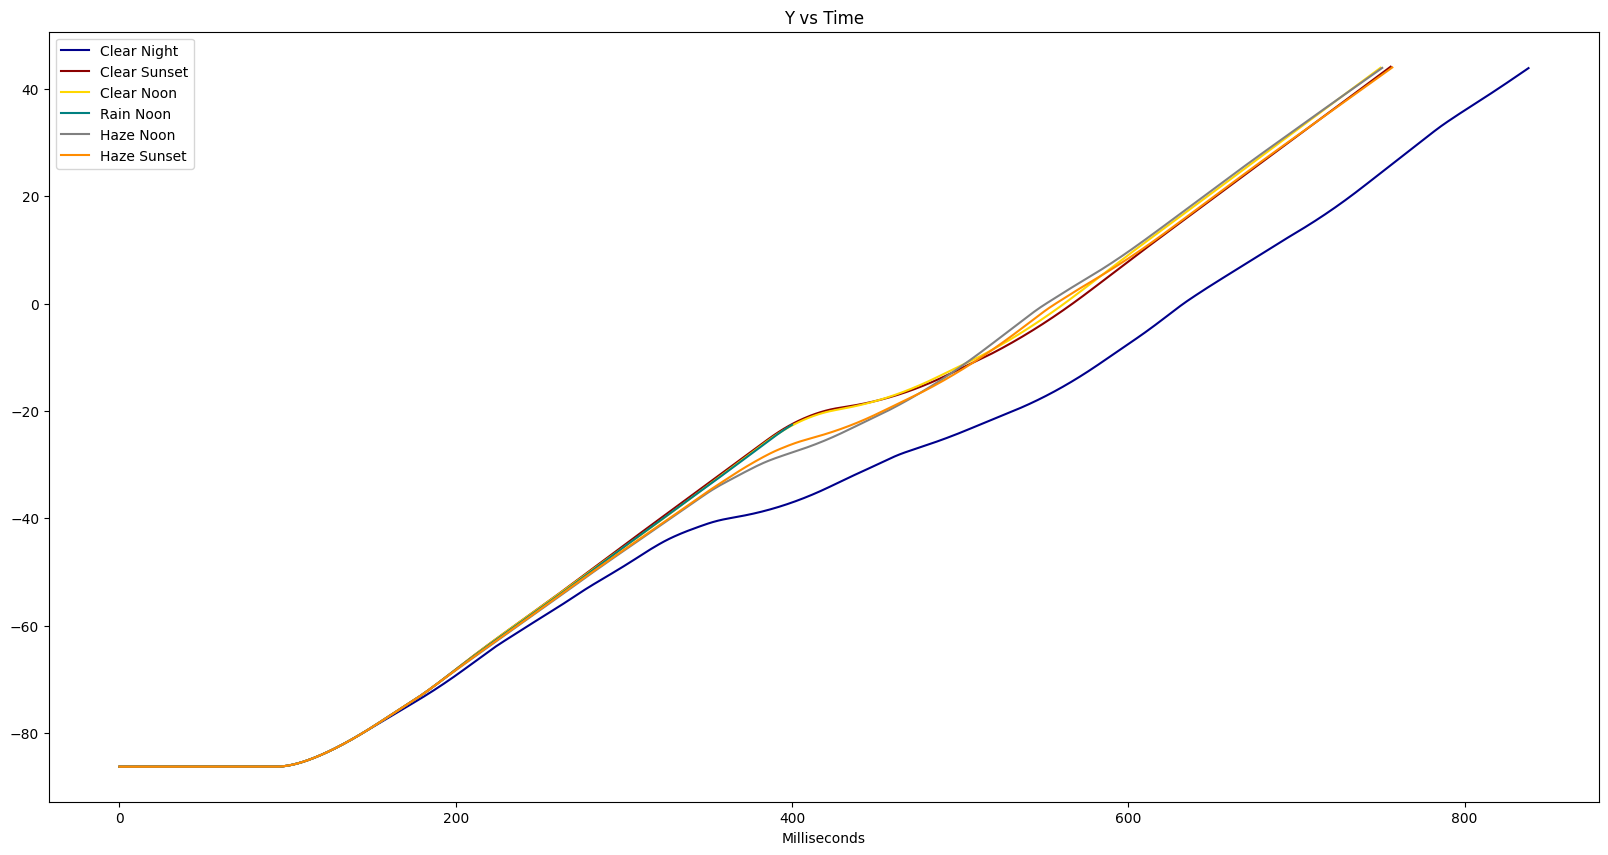

In [22]:
## Y vs Time
plt.figure(figsize=(20,10))

plt.title("Y vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['y'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['y'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['y'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['y'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['y'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['y'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/y_time.png")
plt.show()

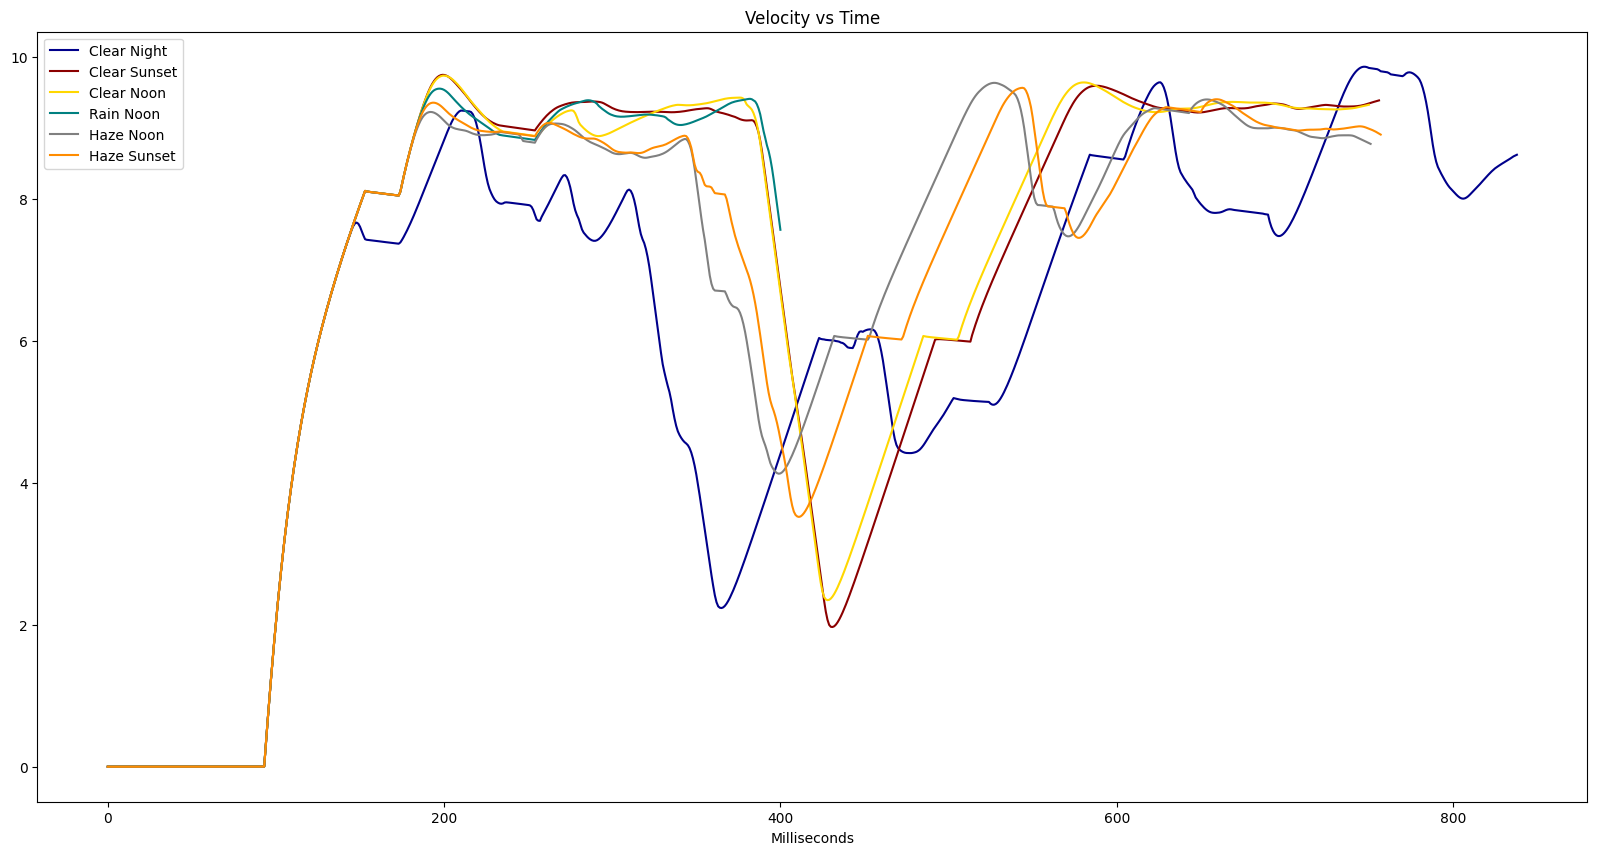

In [23]:
## Velocity vs Time
plt.figure(figsize=(20,10))

plt.title("Velocity vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['v'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['v'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['v'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['v'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['v'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['v'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/velocity_time.png")
plt.show()

**4. Based on your intuition and life experience, which of the features do you think will change during an accident? How will the feature(s) change? By looking at the plots you generated in Task 1.3, combined with your reasoning (without looking at ‘route_highway.txt’), which weather condition(s) has an accident? (1 point)**

- throttle: would expect to be negative, as velocity slows
- velocity: would expect to drop
- steer: direction may or may not change
- brake: may or may not change dependning on the abruptness of the crash. Would expect a slight change in general
- x, y, cvip: would be hard to compare against non accident data


Based on the throttle, steering, and x-change of the car in the clear night scenario, we would predict a crash in that condition.

### Task 2

**1. Suppose each simulation run has a result of accident/non-accident, calculate the probability of accident (counts, marginal probability). Hint: for each run, the collision results are stored in ‘route_highway.txt’. You can check the accident status by looking at the ‘status’ field under the ‘record’ section (‘Completed’ means no accident; ‘Failed’ means an accident has occurred). (1 point)**

Our data includes 6 simulations in distinct weather conditions. There was only one recorded crash, which took place in the rain-noon simulation. Therefore, without knowing the weather conditions, the probability of a crash in any given condition would be $1/6$.

**2. By looking at the completion records and the plots you generated in Task 1, under which weather condition(s) did the accident happen? Does that match your guess in Task 1? When did the accident happen during those simulation runs? Why do you think the accident happened at that instance? Discuss each accident case separately. (2 points)**

The crash occured in the rain-noon weather condition, which does not match our prediction from above. It took place slightly after 400 milliseconds into the simulation. The graphs give no obvious insight into why the crash occured exactly at that time. Some minor observations from the plots include the following: 
- Insufficient breaking: the graph reveals that the vehicle did not break consistently during the time right before the crash. Additinally, it began breaking later than in the other cases. This lines up with what we viewed in the simulation through Carla.
- Throttle: From the throttle vs time graph, we can see the vehicle accelerating immediately preceeding the crash.
- Cvip: The EV remained consistenyl close to the risky NPC actor throughout the duration of the simulation.

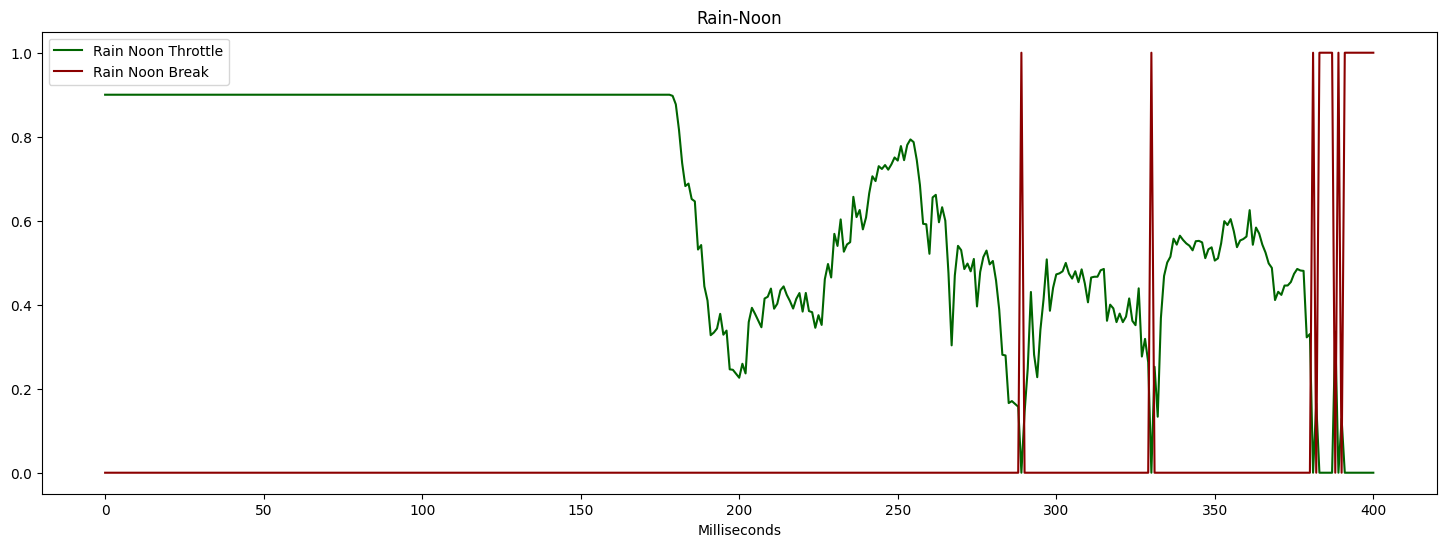

In [24]:
# Rain breaking
plt.figure(figsize=(18,6))

plt.title("Rain-Noon")
plt.xlabel("Milliseconds")

plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='darkgreen',label="Rain Noon Throttle")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='darkred',label="Rain Noon Break")

plt.legend()
# plt.savefig("Figures/rain_noon_throtte_break.png")
plt.show()

**3. Accidents are caused by abnormal AV behavior. However, there are other adverse driving conditions when there are abnormal AV behaviors while no accident occurs. From the plots you generated in Task 1.3, do you observe any other abnormal behavior? If so, what do you think is (are) the cause(s) of this behavior? (2 points)**

In the clear night weather condition, the EV displayed atypical behavior. This includes:
- consistenly lower speeds
- lane change
- jittery steering, even before lane change
- throttle usage very jumpy, typically either fully on or fully off
- maintains maximum distance from NPC actor

We believe many of these observations are due to EV nighttime programmed behavior probably being more risk-adverse and aware of surroundings.

**4. In this question, we explore differences between abnormal and normal runs. Complete the following questions (6 points)**
>**a. We study the following features: “brake”, “steer”, “v”, “y”, “x”, “cvip”, “throttle”. Plot the distribution of each feature for the abnormal runs (including the accident runs) vs normal runs. Treat the values at each time point as an independent individual sample and generate the density plot of the distribution. Describe the difference between the “steer” distribution for normal and abnormal runs.**

In [25]:
normal = pd.concat([clear_noon[['brake','steer','v','y','x','cvip']],
                    clear_sunset[['brake','steer','v','y','x','cvip']],
                    haze_noon[['brake','steer','v','y','x','cvip']],
                    haze_sunset[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)
abnormal = pd.concat([clear_night[['brake','steer','v','y','x','cvip']],rain_noon[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)

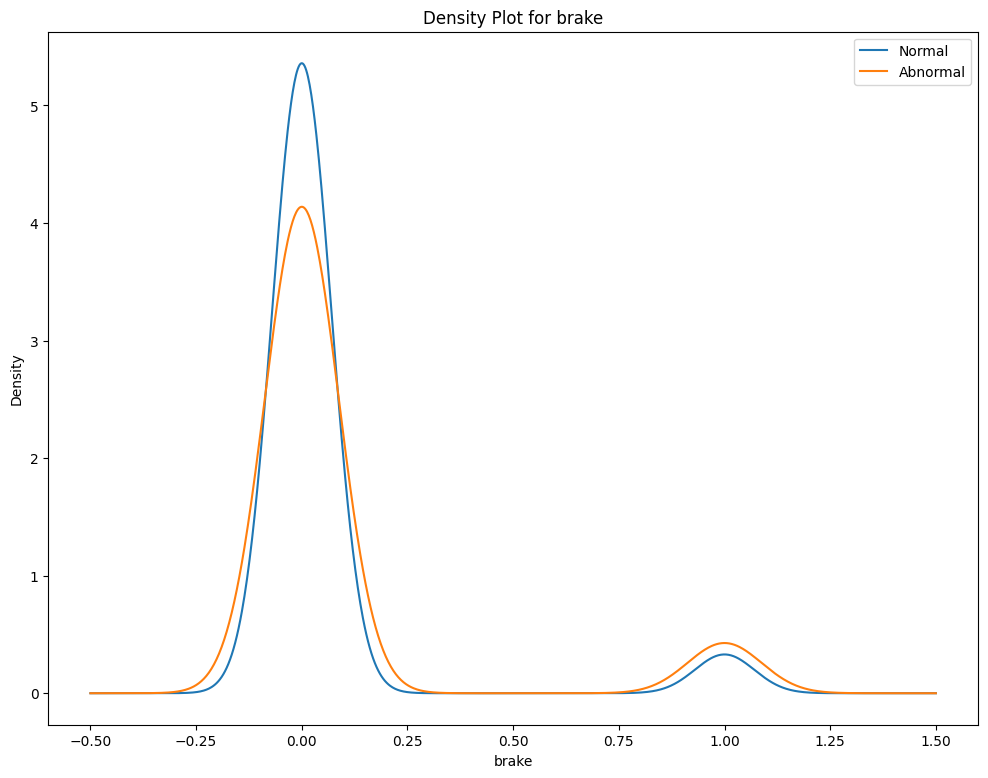

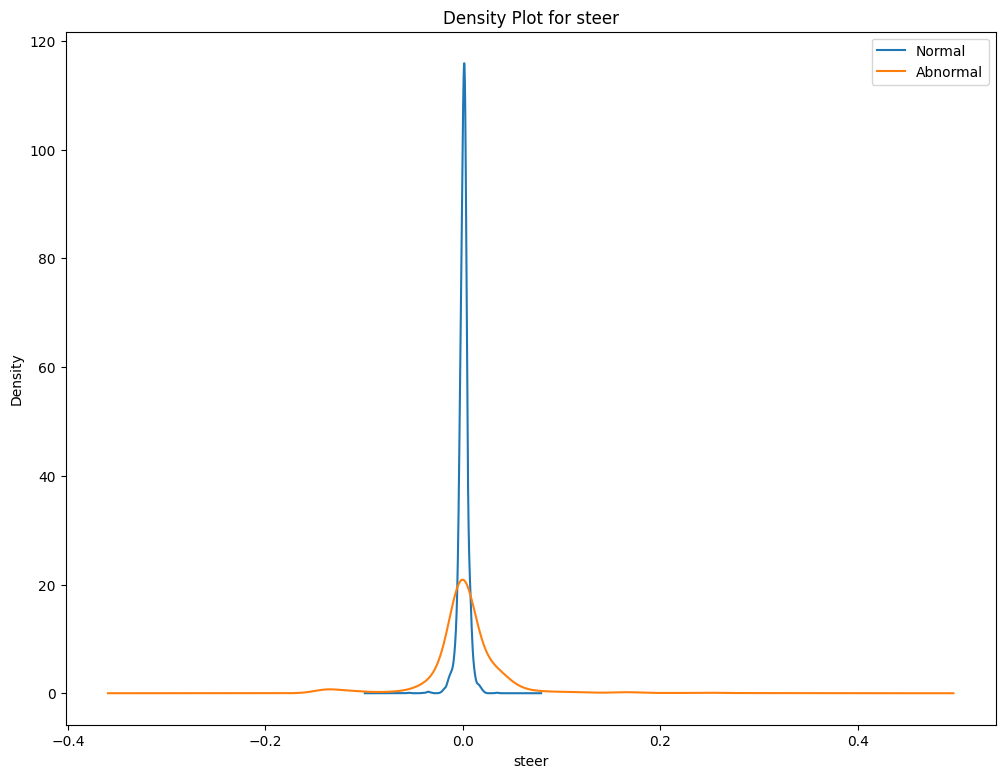

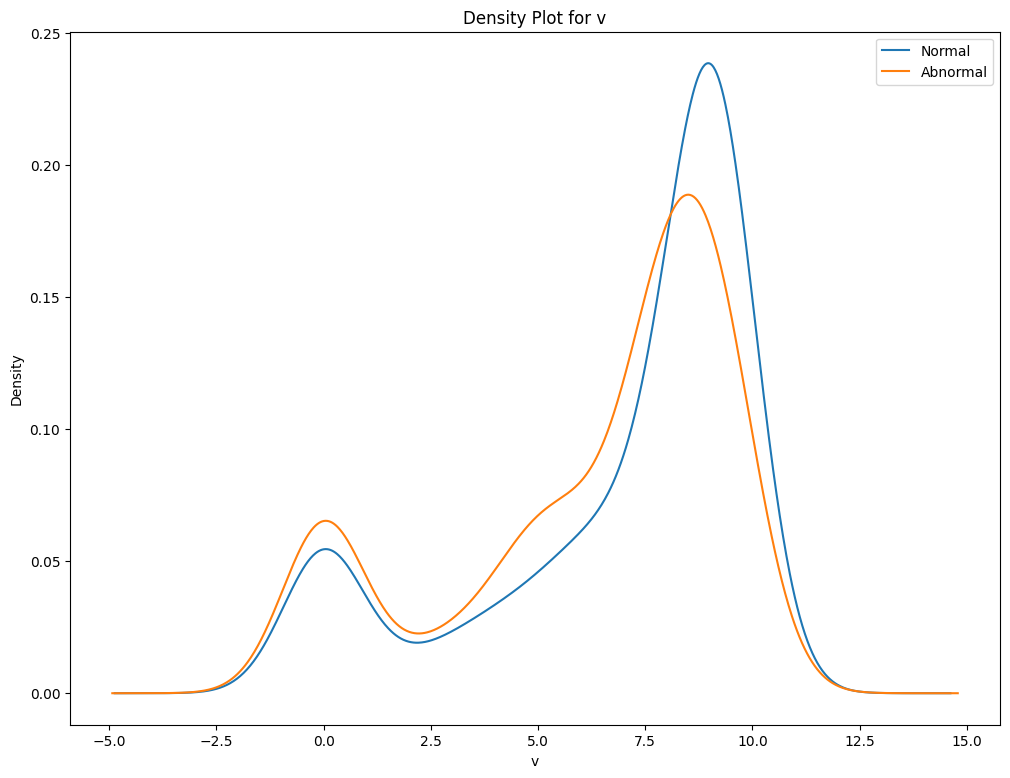

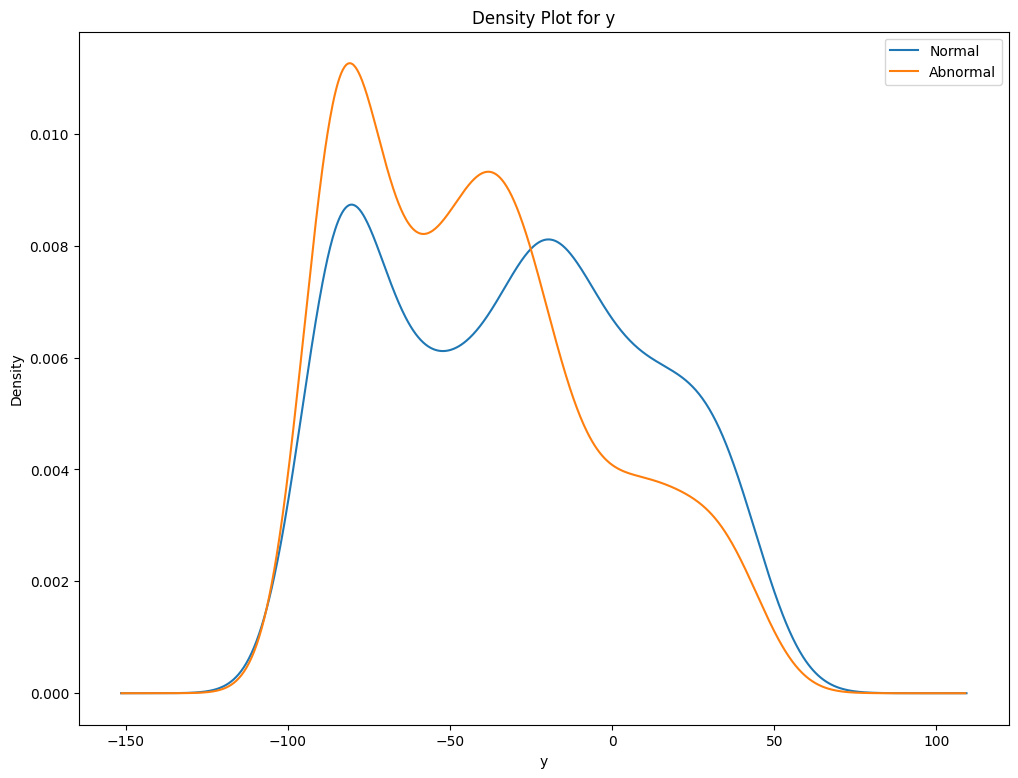

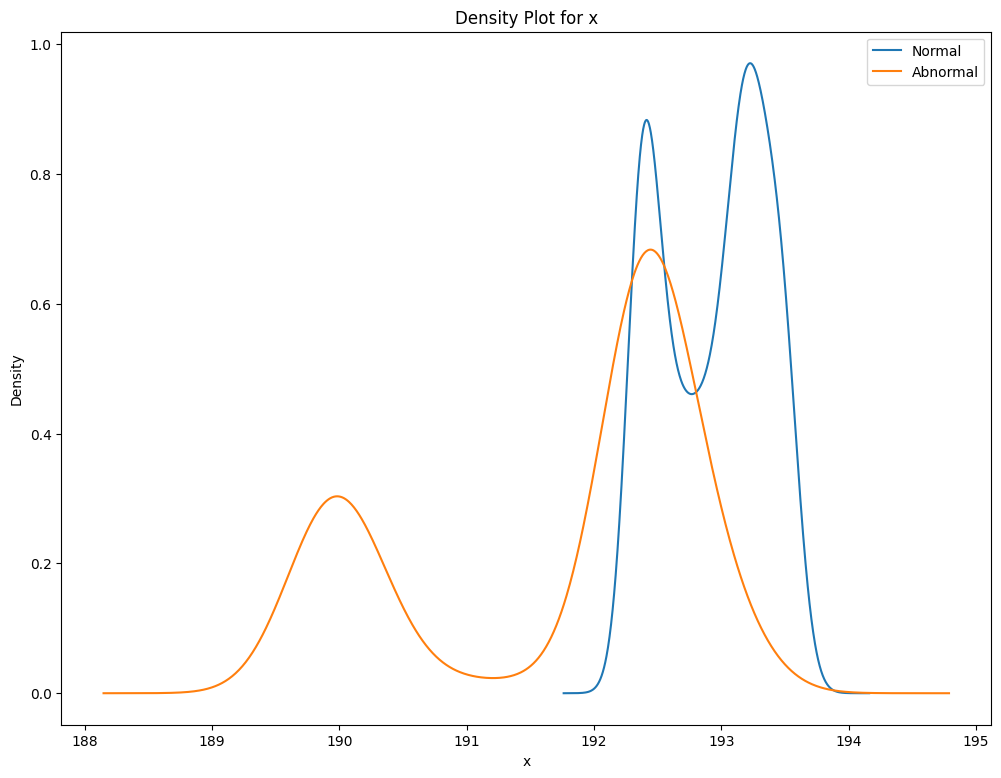

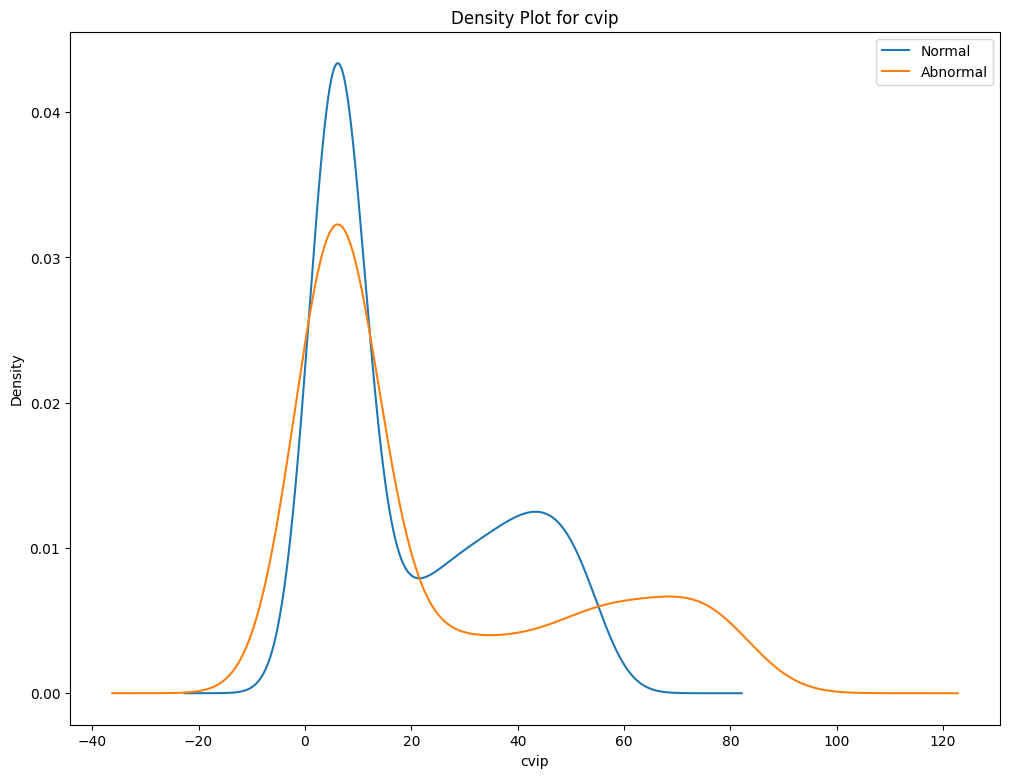

In [26]:
normal['runtype'] = 0
abnormal['runtype'] = 1

features = ['brake','steer','v','y','x','cvip']
for f in features:
    plt.figure(figsize=(12,9))
    
    normal[f].plot.kde(label='Normal', bw_method=0.3)
    abnormal[f].plot.kde(label='Abnormal', bw_method=0.3)
    
    plt.title(f'Density Plot for {f}')
    plt.xlabel(f'{f}')
    plt.ylabel('Density')
    plt.legend()
    
    # plt.savefig(f"Figures/{f}_normal_vs_abnormal.png")
    plt.show()

Comparing the steering between the normal nd abnormal runs, there were two primary differences.
- The normal runs had a higher density close to zero. This is because these EVs stayed in the same lane, as opposed to in one of the abnormal cases (clear_night) where the EV changed lanes. 
- Greater variance in steering for abnormal runs, due to the same reason as above.

>**b. To study differences between normal and abnormal runs, you will use 2- sample t-test. In this part, apply the 2-sample t-test on the ‘steer’ values of abnormal runs vs normal runs:**
>
>>**i. State the null and alternative hypotheses.**
>>
>>**ii. Perform the test and calculate test statistics.**
>>
>>**iii. Assume a significance level of 0.05, what is your conclusion?**
>>
>**Note: Be sure to compare the variances of the two groups to decide
which version of the t-test to use**

#### 2-sample t-test on the ‘steer’ values of abnormal runs vs normal runs

$H_0$: There is no significant difference between the steering variable population means between the normal and abnormal runs.  
$H_1$: There is a significant difference in said population means.

$\alpha$=0.05


In [27]:
## Two-sided T-test (using sample variances) with Scipy

t, p = scipy.stats.ttest_ind(normal['steer'],abnormal['steer'])

print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: -2.059574394684549
P-value: 0.03949993360519476 

There exists significant evidence to reject the Null Hypothesis.


>**c. Does the testing result contradict your observation on the “steer” feature in part 4.a? Why?**

This outcome contradicts our intuition as both the normal and abnormal distributions appear to have means centered very close to zero. Thus we originally thought that there wouldnt be a significant difference between their means.

**5. Among the features (‘throttle’, ‘brake’, ‘steering’, ‘cvip’, ‘x’, ‘y’, ‘v’), some of them are better indicators of abnormal AV behavior. (4 points)**
>**a. By looking at the distribution plots of the features in Task 2.4, can you identify these indicators? Explain your choice.**

- Steer - The normal runs had a higher density closer to zero and the abnormal had a higher variance and spread.

- X and Cvip - The abnormal plot shows two local maximums, one indicating a closer distance to the NPC actor and the other indicating a farther distance which was the response during the clear-night run where the EV changed lanes.


>**b. For the fields you identified as good accident indicators above, are they related (Calculate the Pearson correlation coefficient between each pair of the indicators to justify your answer)? If so, how does that affect the predicting power of using one indicator versus using all of them?** 

In [28]:
data_full = pd.concat([normal,abnormal])

In [29]:
## steer, x, cvip
corr_steer_x = scipy.stats.pearsonr(data_full['steer'],data_full['x']).statistic
corr_steer_cvip = scipy.stats.pearsonr(data_full['steer'],data_full['cvip']).statistic
corr_cvip_x = scipy.stats.pearsonr(data_full['cvip'],data_full['x']).statistic

print(f"Pearson Correlations\n\nSteering and x: {corr_steer_x}\nSteering and cvip: {corr_steer_cvip}\ncvip and x: {corr_cvip_x}")

Pearson Correlations

Steering and x: 0.16049701319159093
Steering and cvip: -0.06898881039039098
cvip and x: -0.3015787487970796


Although we dont have enough colinearity with these features to have a major negative difference in the predictivng power, in general we would want to avoid using features with higher correlation since it would take away from the predicting power by skewing the data. Of the above options, cvip and x are the most correlated and it may be redundant to include them both. That being said, since these features are relatively independent, using all of them would give us more predicting power than just using one of them


**6. Among the better indicators of abnormal behavior that you identified in Task 2.5, choose the one with the strongest predictive power. In this question, we want to use the Kolmogorov–Smirnov two-sample test to verify whether that indicator is indeed a good indicator of abnormal AV behavior. (5 points)**

In [30]:
## T Test for the 'better indicators' to determine which feature has the strongest predictive power.
features = ['steer','x','cvip']

for f in features:
    print(f)
    t, p = scipy.stats.ttest_ind(normal[f],abnormal[f])

    print(f'T-statistic: {t}')
    print(f'P-value: {p}','\n')

steer
T-statistic: -2.059574394684549
P-value: 0.03949993360519476 

x
T-statistic: 50.06248806162103
P-value: 0.0 

cvip
T-statistic: -6.468997424873898
P-value: 1.0980157019780513e-10 



It appears the strongest predictor is x location.

>**a. Construct the null and the alternative hypothesis and state them below.**
>
>**b. Perform the KS two-sample test and calculate its statistics.**
>
>**c. Assuming a significance level of 0.05, what is your conclusion?**

#### 2-sample KS on the ‘x’ values of abnormal runs vs normal runs


$H_0$: There is no significant difference between the x variable distributions between the normal and abnormal runs.  
$H_1$: There is a significant difference between the x variable distributions between the normal and abnormal runs.

$\alpha$=0.05

In [31]:
## Using x
t, p = scipy.stats.kstest(normal['x'],abnormal['x'])
print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: 0.5740786464011629
P-value: 2.6613101312928488e-269 

There exists significant evidence to reject the Null Hypothesis.


>**d. Repeat the same test on a feature that you did not select as an indicator of abnormal behavior in Task 2.5. What is your conclusion?**

#### 2-sample KS on the ‘brake’ values of abnormal runs vs normal runs

$H_0$: There is no significant difference between the brake variable distributions between the normal and abnormal runs.  
$H_1$: There is a significant difference between the brake variable distributions between the normal and abnormal runs.

$\alpha$=0.05

In [32]:
## Using brake
t, p = scipy.stats.kstest(normal['brake'],abnormal['brake'])
print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: 0.03556296628829175
P-value: 0.210072458272195 

Failed to reject Null Hypothesis.


>**e. What are the major differences between the KS test and the t-test?**

Some of the major differences between the t-test and KS test include the following:

- T-test: Measures the difference in means
- T-test: Used to determine whether two groups have different true means.
- T-test: Statistic calculated with the pooled standard error and the number of observations in each group.
- KS-test: Measures the maximum difference between CDFs of two samples
- KS-test: Determines whether samples are drawn from different distributions.
- KS-test: Incorporates number of observations but NOT pooled standard error, or any measure of spread.

The t-test looks squarely at the means, though still taking account for variance (standard error) and group size. The KS-test looks at the distribution as a whole and any large discrepencies within. 

**7. Keeping in mind that this experiment is executed over a period of time, what assumption did you make when using the KS two-sample test on the distributions in Task2.6? Are you able to come up with one situation where this assumption fails? (2 points)**

The assumption we took was that all variables are independent to properly take the KS two-sample test on the distributions of task2.6. This means treating the data as if each moment in the simulation is independent of the previous one when actually it is not. This assumption fails when events happening in the simulation are dependent on the ones that happened before, for example, the braking part of the simulation. As the AV has a reaction time, as he sees the car beginning to cut him off (t-1) in timeframe t he reacts in a way that is dependent on t-1 and initiating breaking, making v, the throttle, braking, and cvip at time t also dependent at time t-1 therefore making this assumption fail.

**8. The dynamic-time-wrapper (DTW) is a method to compare two time-series data (such as the control and the trajectory data collected in our simulation). Use the DTW package in python (dtaidistance · PyPI), and apply the DTW distance on the two time-series dataset (using steering data of clear-noon as a reference): (1) steering data of clear-night and (2) steering data of clear-sunset. What can you say about the DTW distance for (1) and (2) with respect to the reference? (3 points)**

In [36]:
s1 = np.array(clear_noon['steer'])

steering data of clear-night

In [37]:
s2 = np.array(clear_night['steer'])
d_clear_night = dtw.distance_fast(s1, s2)
print(d_clear_night)

1.17603264771516


steering data of clear-sunset

In [38]:
s2 = np.array(clear_sunset['steer'])
d_clear_sunset = dtw.distance_fast(s1, s2)
print(d_clear_sunset)

0.050521340023401175


In [39]:
# note: DTW compares time series that dont nesesarily line up perfectly
# low DTW distance means the two series are very similar, while a high DTW distance indicates more dissimilarity
# it uses the most lined up layout to get the measurement